In [1]:
# Import the Libraries

import pandas as pd
import numpy as np

import requests
import json

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib notebook

from fbprophet import Prophet
from fbprophet.plot import plot_plotly


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Scraping the real time from the website

url = "https://api.covid19india.org/data.json"
r = requests.get(url)
data = r.json()

In [3]:
# Taking only necessary values

data = data['cases_time_series']

In [4]:
# Converting into dataframe

df = pd.DataFrame(data)

In [5]:
# Converting type into interger format

df = df.astype({'totalconfirmed': 'int64', 'totalrecovered': 'int64', 'totaldeceased': 'int64',
               'dailyconfirmed': 'int64', 'dailyrecovered': 'int64', 'dailydeceased': 'int64'})

In [6]:
# Checking the columns

df.columns

Index(['dailyconfirmed', 'dailydeceased', 'dailyrecovered', 'date', 'dateymd',
       'totalconfirmed', 'totaldeceased', 'totalrecovered'],
      dtype='object')

In [7]:
# Keeping the required columns

columns_to_keep = ['dateymd', 'dailyconfirmed']
df = df[columns_to_keep]

In [8]:
# Renaming the columns

df.rename(columns = {'dateymd':'Date', 'dailyconfirmed':'Confirmed'}, inplace = True)

In [9]:
# Proper Date Format

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)

In [10]:
df.head()

Date  Confirmed
0 2020-01-30          1
1 2020-01-31          0
2 2020-02-01          0
3 2020-02-02          1
4 2020-02-03          1

In [11]:
df.tail()

Date  Confirmed
366 2021-01-30      13073
367 2021-01-31      11527
368 2021-02-01       8579
369 2021-02-02      11001
370 2021-02-03      12925

<IPython.core.display.Javascript object>


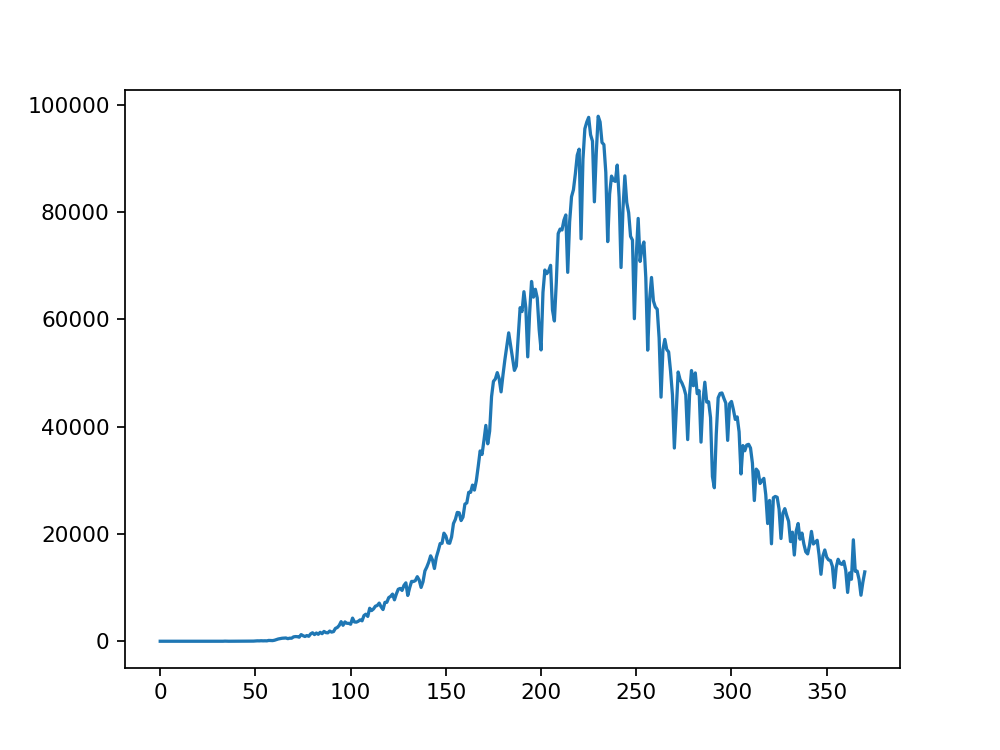

In [12]:
%matplotlib notebook
# plot the time series
df['Confirmed'].plot()

In [13]:
# Preparing dataset for FbProphet

train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(df['Date'])
train_dataset['y'] = df.iloc[:, 1]

In [14]:
train_dataset.head()

ds  y
0 2020-01-30  1
1 2020-01-31  0
2 2020-02-01  0
3 2020-02-02  1
4 2020-02-03  1

In [15]:
train_dataset.tail()

ds      y
366 2021-01-30  13073
367 2021-01-31  11527
368 2021-02-01   8579
369 2021-02-02  11001
370 2021-02-03  12925

In [17]:
# Creating and fitting the Prophet model with default values

prophet_basic = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_basic.fit(train_dataset)

In [18]:
# Predicting the values for the future

future = prophet_basic.make_future_dataframe(periods = 28)

In [19]:
future.tail(28)

ds
371 2021-02-04
372 2021-02-05
373 2021-02-06
374 2021-02-07
375 2021-02-08
376 2021-02-09
377 2021-02-10
378 2021-02-11
379 2021-02-12
380 2021-02-13
381 2021-02-14
382 2021-02-15
383 2021-02-16
384 2021-02-17
385 2021-02-18
386 2021-02-19
387 2021-02-20
388 2021-02-21
389 2021-02-22
390 2021-02-23
391 2021-02-24
392 2021-02-25
393 2021-02-26
394 2021-02-27
395 2021-02-28
396 2021-03-01
397 2021-03-02
398 2021-03-03

In [20]:
forecast = prophet_basic.predict(future)

<IPython.core.display.Javascript object>


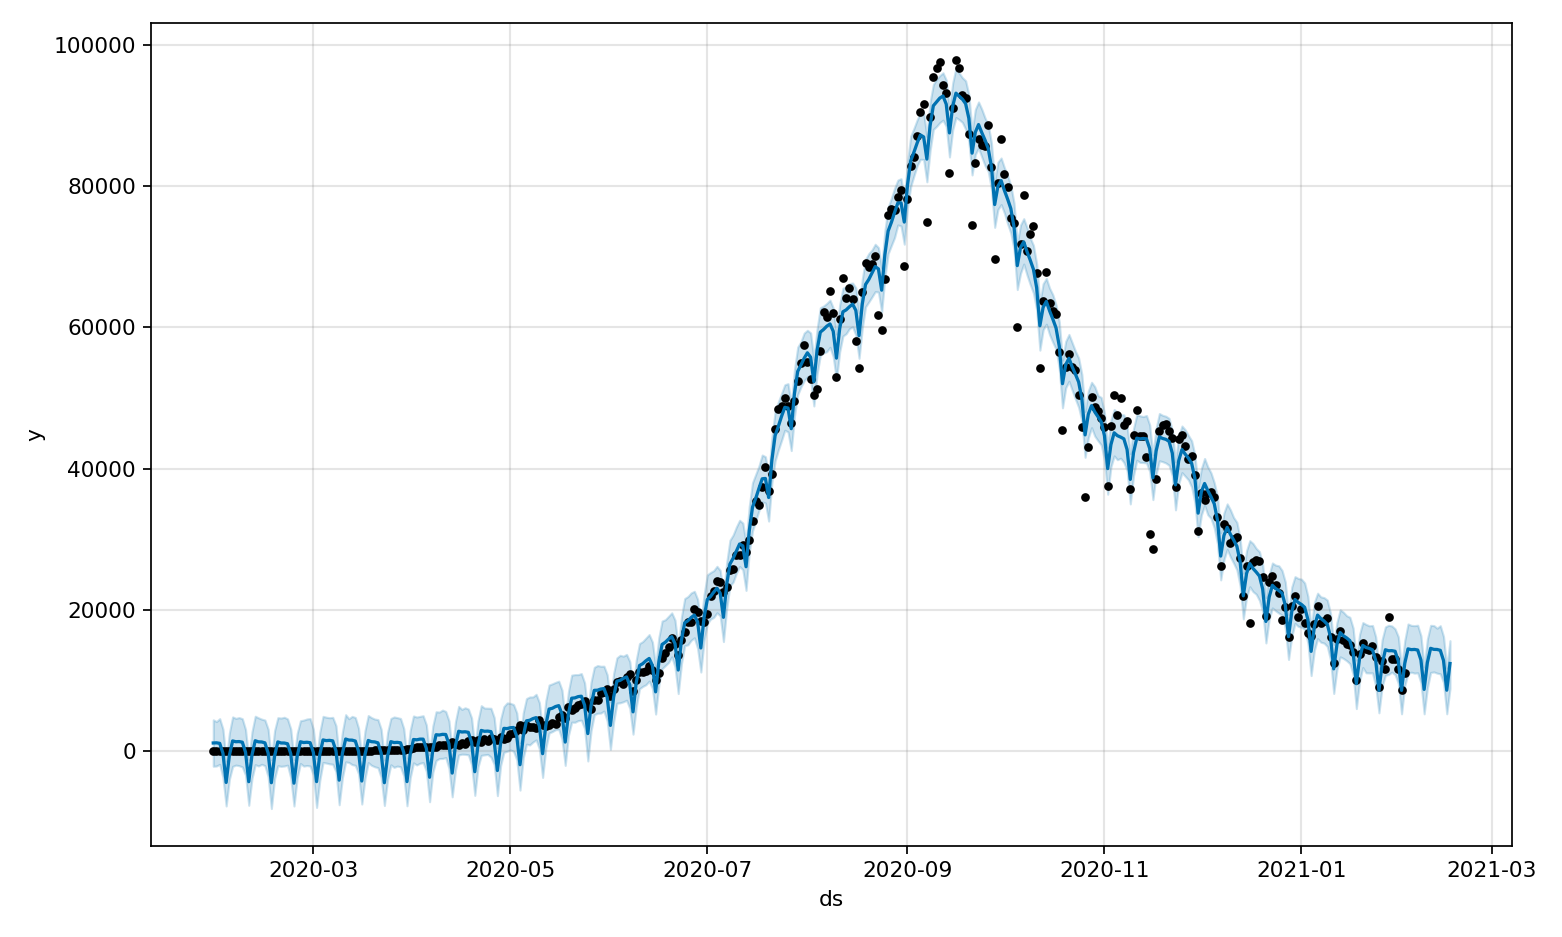

In [21]:
# Plotting the predicted data

fig1 = prophet_basic.plot(forecast)

In [24]:
forecast[['ds','yhat']].tail(28)

ds          yhat
371 2021-02-04  14108.642071
372 2021-02-05  14128.134040
373 2021-02-06  14038.067147
374 2021-02-07  12623.888340
375 2021-02-08   8439.579307
376 2021-02-09  12244.909187
377 2021-02-10  14222.735081
378 2021-02-11  14096.584949
379 2021-02-12  14083.714561
380 2021-02-13  13962.532871
381 2021-02-14  12520.485630
382 2021-02-15   8313.284336
383 2021-02-16  12102.107113
384 2021-02-17  14070.859883
385 2021-02-18  13943.733494
386 2021-02-19  13938.249098
387 2021-02-20  13832.686267
388 2021-02-21  12413.983328
389 2021-02-22   8236.996192
390 2021-02-23  12061.741049
391 2021-02-24  14070.707639
392 2021-02-25  13986.476853
393 2021-02-26  14024.832699
394 2021-02-27  13962.260779
395 2021-02-28  12583.920228
396 2021-03-01   8442.972895
397 2021-03-02  12297.892692
398 2021-03-03  14329.839517

<IPython.core.display.Javascript object>


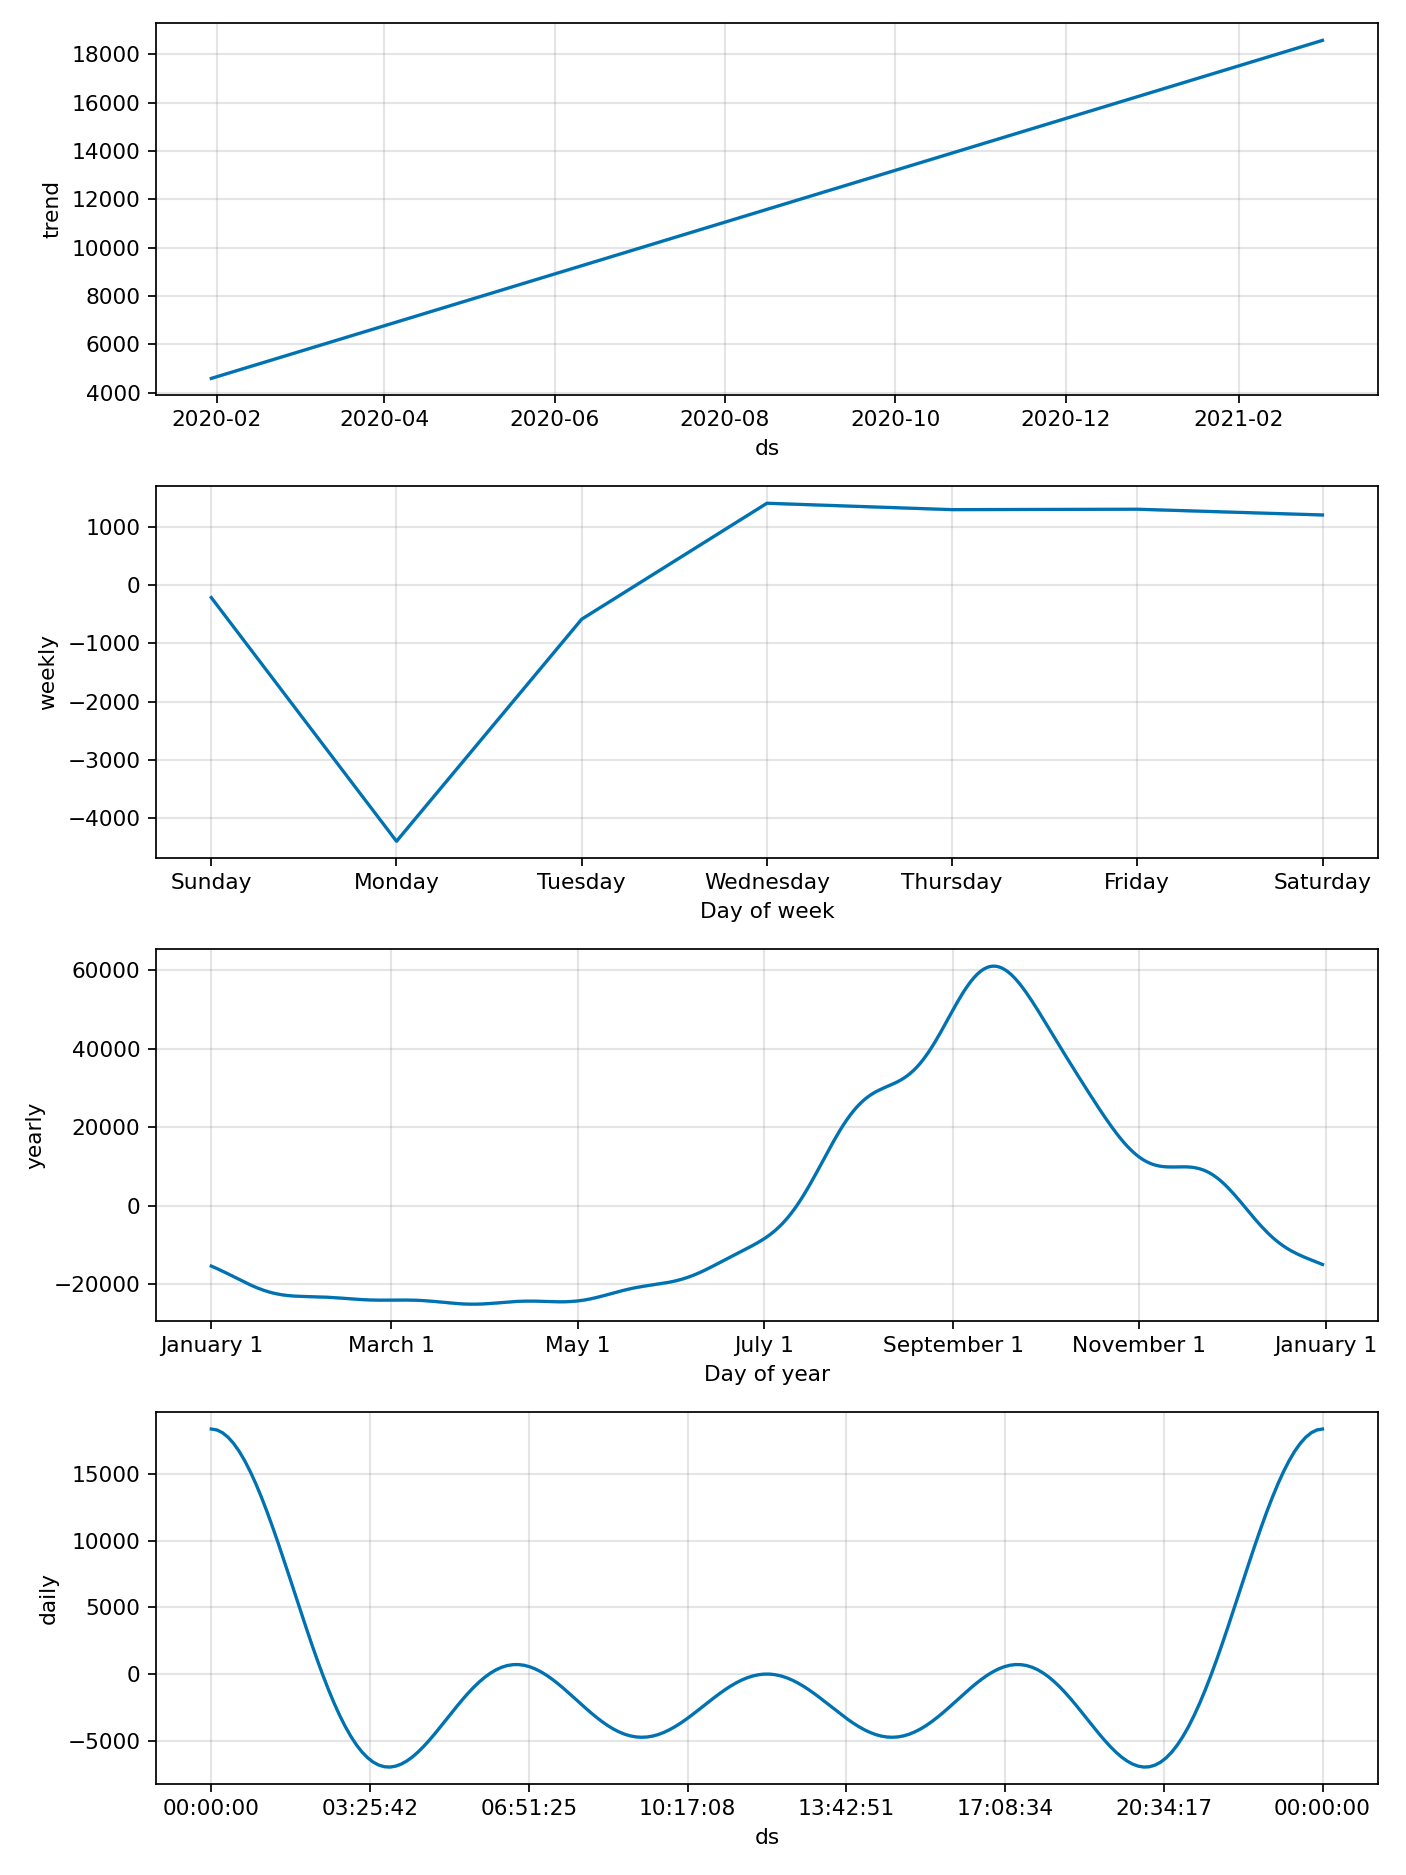

In [25]:
# Plotting the forecasted components

fig1 = prophet_basic.plot_components(forecast)

In [26]:
print('The Lower Limit of Daily Confirmed Cases today will be = {}'.format(int(forecast[forecast['ds'] == '2021-02-04']['yhat_lower'].iloc[0])))

The Lower Limit of Daily Confirmed Cases today will be = 10721


In [27]:
print('The Predicted Value of Daily Confirmed Cases today will be = {}'.format(int(forecast[forecast['ds'] == '2021-02-04']['yhat'].iloc[0])))

The Predicted Value of Daily Confirmed Cases today will be = 14108


In [28]:
print('The Upper Limit of Daily Confirmed Cases today will be = {}'.format(int(forecast[forecast['ds'] == '2021-02-04']['yhat_upper'].iloc[0])))

The Upper Limit of Daily Confirmed Cases today will be = 17431
